In [1]:
import pandas as pd 
import missingno as msno
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import json
import sys
from pathlib import Path

proj_path = Path('/cluster') / 'work' / 'stefandt' / 'pers-pred'
resolved = proj_path.resolve()
if resolved not in sys.path: sys.path.append(str(resolved))

from src.utils import get_commons
from transformers import DistilBertTokenizerFast

paths, constants, config, logger, device = get_commons()

/cluster/home/stefandt/anaconda3/envs/ppconda/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-06-20 08:09:00,274 - ArgumentLogger - INFO - Arguments:
2024-06-20 08:09:00,276 - ArgumentLogger - INFO - seed: 42
2024-06-20 08:09:00,276 - ArgumentLogger - INFO - dataframe: {'generate': False, 'mbti_frac': 0.1, 'bigfive_c_frac': 1.0, 'bigfive_s_frac': 1.0}
2024-06-20 08:09:00,277 - ArgumentLogger - INFO - eda: {'generate': False}
2024-06-20 08:09:00,278 - ArgumentLogger - INFO - reduce: {'generate': False, 'use_full': False}
2024-06-20 08:09:00,279 - ArgumentLogger - INFO - preprocessing: {'generate_features': False, 'generate_partially_cleaned': False, 'generate_cleaned': False, 'generate_embeddings': False, 'generate_aggregated': True, 'generate_glove': False, 'generate_filled': True}
2024-06-20 08:09

device: cpu


In [2]:
df = pd.read_csv(paths['new']['no-emoji'], header=[0, 1], index_col=0)

In [3]:
lengths = df[('TEXT', 'TEXT')].apply(lambda x: len(str(x)))

In [4]:
d140 = df.loc[lengths[lengths == 140].index][('TEXT', 'TEXT')]
d140.shape

(41928,)

In [5]:
d200 = df.loc[lengths[lengths == 200].index][('TEXT', 'TEXT')]
d200.shape

(54987,)

In [6]:
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

/cluster/home/stefandt/anaconda3/envs/ppconda/lib/python3.11/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [7]:
d140

3703        N's conversations can go off on extreme tangen...
4309        I do that a lot too.  Loosely defined, that co...
4517        I was just actually about to, perhaps in a few...
5039        I feel the exact same way but at the end of th...
5660        Sorry, I guess I misinterpreted your post then...
                                  ...                        
17754433    MENTION She’s like oh mom! I also pray for the...
17756124    Uni is a scam why am I paying £50 for a gown I...
17756148    really craving some romantic love today where ...
17756506    Need to organise. My poems are wandering aroun...
17756529    How will you measure your writing legacy? (wro...
Name: (TEXT, TEXT), Length: 41928, dtype: object

In [8]:
tokenize = lambda x: tokenizer(x).input_ids

In [9]:
t140 = d140.apply(tokenize)

In [10]:
t200 = d200.apply(tokenize)

In [11]:
l140 = t140.apply(len).value_counts().sort_index()
l200 = t200.apply(len).value_counts().sort_index()

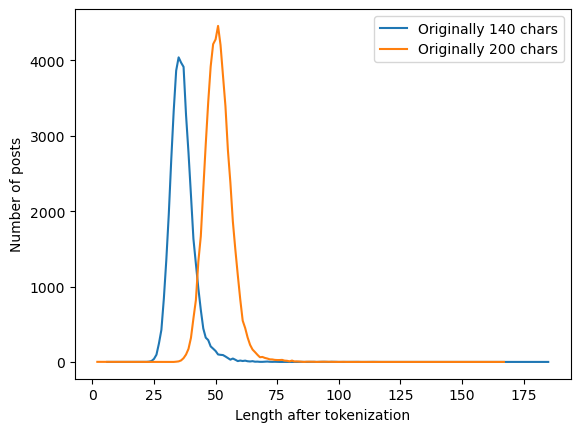

In [12]:
plt.figure()

plt.plot(l140.index, l140.values, label='Originally 140 chars')
plt.plot(l200.index, l200.values, label='Originally 200 chars')
plt.xlabel('Length after tokenization')
plt.ylabel('Number of posts')
# plt.title("Distribution of Posts of Length 140 and 200 after Tokenization")
plt.legend()